# Апта 6 есептер

📝 **Pandas**: Практикалық тапсырмалар (қазақша)


1. Series — негізгі тапсырмалар
temperatures деген Series жасаңыз. Ішінде қала температуралары болсын:
 -   Алматы: 5
 -   Астана: –3
 -   Шымкент: 7

 Осы Series-ті экранға шығарыңыз.

2.  Алматының температурасын индекстің көмегімен алыңыз.
3.  Температурасы 0-ден жоғары қалаларды сүзіңіз.


In [1]:
import pandas as pd

In [2]:
temperatures = pd.Series([5, -3, 7])
print(f"Almaty: {temperatures[0]}")
filtered = temperatures[temperatures>0]
filtered

Almaty: 5


,0
0,5
2,7


2. DataFrame — кестемен жұмыс
-----
1. Студенттер туралы DataFrame жасаңыз:
name
-  age score
-  Aigerim 20 88
-  Dias 22 92
-  Miras 21 75
-  Dana 19 95

2.  Жасы 20-дан жоғары студенттерді таңдаңыз.
3.  Бағандарды тек name және score етіп шығарыңыз.
4.  Ең жоғары балл жинаған студенттің атын табыңыз.



In [3]:
stud = [
    ["Aigerim", 20, 88],
    ["Dias", 22, 92],
    ["Miras", 21, 75],
    ["Dana", 19, 95]
]
students = pd.DataFrame(stud, columns=["name", "age", "score"])
students

,name,age,score
0,Aigerim,20,88
1,Dias,22,92
2,Miras,21,75
3,Dana,19,95


In [4]:
# 2
print(students[students["age"]>20])

# 3
print(students[["name", "score"]])

# 4
max_score = students[students["score"]==students["score"].max()]
print(max_score["name"])
# print("Ең жоғары ұпай жинаған:", max_score["name"])

    name  age  score
1   Dias   22     92
2  Miras   21     75
      name  score
0  Aigerim     88
1     Dias     92
2    Miras     75
3     Dana     95
3    Dana
Name: name, dtype: object


#3. Индексация және таңдау
---
1.  iloc арқылы 3-жолдың 2-бағанын алыңыз.
2.  loc көмегімен студенттің аты “Dias” болған жолды шығарыңыз.


In [5]:
# 1 - iloc
print("3-жолдың 2-бағаны:", students.iloc[2, 1])

print("--" * 10)

# 2 - loc
print('“Dias” болған жол:',students.loc[1])

3-жолдың 2-бағаны: 21
--------------------
“Dias” болған жол: name     Dias
age        22
score      92
Name: 1, dtype: object


# 4. Шарт бойынша сүзу

Дәрілер туралы DataFrame жасаңыз:
 -   drug price amount
 -   A 1200 5
 -   B 800 10
 -   C 600 3
 -   D 2000 8

Тапсырмалар:
 1.  ағасы 1000 теңгеден қымбат дәрілерді шығарыңыз.
 2.  ағасы 600-800 аралығындағы  дәрілерді таңдаңыз.
 3.  Қордағы саны (amount) 5-тен аз дәрілерді шығарыңыз.


In [6]:
drugs = pd.DataFrame([
    ["A", 1200, 5],
    ["B", 800, 10],
    ["C", 600, 3],
    ["D", 2000, 8]
], columns=["drug", "price", "amount"])

# 1
print(f"price > 1000: \n{drugs[drugs["price"] > 1000]}")
print("__" * 20)
# 2
res = drugs[(drugs["price"] >= 600) & (drugs["price"] <= 800)]
print(f"price > 1000: \n{res}")
print("__" * 20)
# 3
print("(amount) 5-тен аз дәрілер:\n", drugs[drugs["amount"] < 5])

price > 1000: 
  drug  price  amount
0    A   1200       5
3    D   2000       8
________________________________________
price > 1000: 
  drug  price  amount
1    B    800      10
2    C    600       3
________________________________________
(amount) 5-тен аз дәрілер:
   drug  price  amount
2    C    600       3


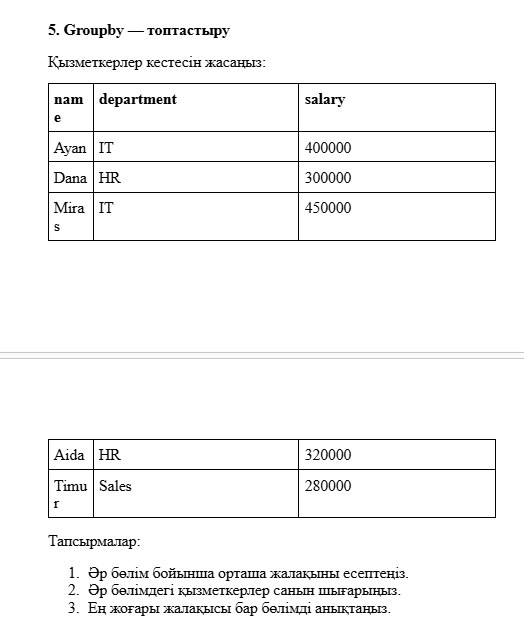

In [7]:
employes = pd.DataFrame(
    [
        ["Ayan", "IT", 400_000],
        ["Dana", "HR", 300_000],
        ["Miras", "IT", 450_000],
        ["Aida", "HR", 320_000],
        ["Timur", "Sales", 280_000]
    ],
    columns=["name", "department", "salary"]
)
employes

,name,department,salary
0,Ayan,IT,400000
1,Dana,HR,300000
2,Miras,IT,450000
3,Aida,HR,320000
4,Timur,Sales,280000


In [8]:
# 1
mean_salarys = employes.groupby(by="department")["salary"].mean()
mean_salarys

,salary
department,
HR,310000.0
IT,425000.0
Sales,280000.0


In [9]:
# 2
count_empl = employes.groupby(by="department")["name"].count()
count_empl

,name
department,
HR,2
IT,2
Sales,1


In [10]:
# 3
max_salary = employes["salary"].max()
employes[employes["salary"] == max_salary]["department"]

,department
2,IT


**6. Агрегаттау (sum, mean, max, min)**

Берілген кестеге сүйеніп:
 -  Әр бөлім үшін жалақының ең кішісі мен ең жоғарғысын табыңыз.
 -  Әр топтағы жалақының суммасын есептеңіз.


In [11]:
# 1.1
employes.groupby(by="department")["salary"].min()

,salary
department,
HR,300000
IT,400000
Sales,280000


In [12]:
# 1.2
employes.groupby(by="department")["salary"].max()

,salary
department,
HR,320000
IT,450000
Sales,280000


In [13]:
# 2
employes.groupby(by="department")["salary"].sum()

,salary
department,
HR,620000
IT,850000
Sales,280000


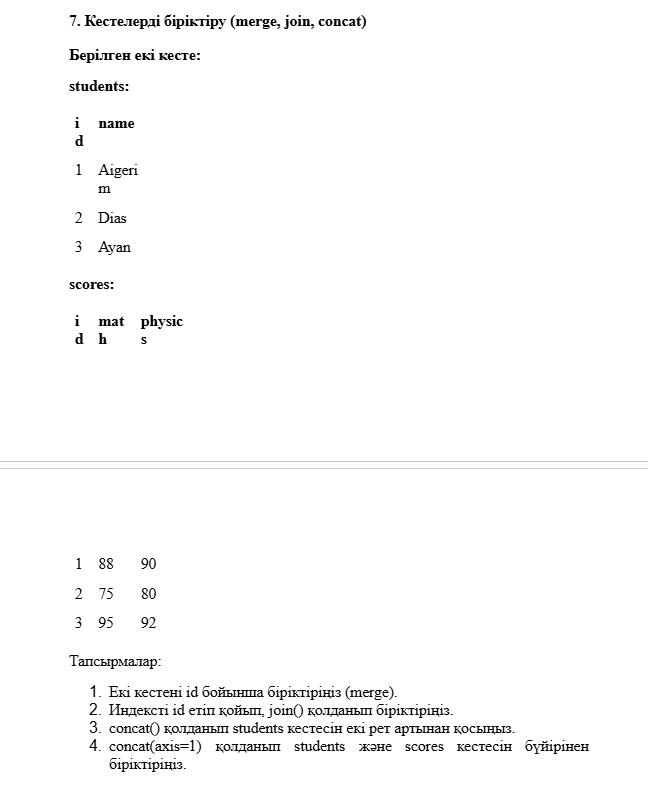

In [14]:
students = pd.DataFrame(
    [
        [1, "Aigerim"],
        [2, "Dias"],
        [3, "Ayan"]
    ],
    columns=["id", "name"]
)
scores = pd.DataFrame(
    [
        [1, 88, 90],
        [2, 75, 80],
        [3, 95, 62]
    ],
    columns=["id", "math", "physics"]
)
students
scores


,id,math,physics
0,1,88,90
1,2,75,80
2,3,95,62


In [15]:
# 1
students.merge(scores, on="id")

,id,name,math,physics
0,1,Aigerim,88,90
1,2,Dias,75,80
2,3,Ayan,95,62


In [16]:
# 2
students.merge(scores, on="id", how="left")

,id,name,math,physics
0,1,Aigerim,88,90
1,2,Dias,75,80
2,3,Ayan,95,62


In [18]:
# 3
stud = pd.concat([students, students, students])
stud

,id,name
0,1,Aigerim
1,2,Dias
2,3,Ayan
0,1,Aigerim
1,2,Dias
2,3,Ayan
0,1,Aigerim
1,2,Dias
2,3,Ayan


In [19]:
# 4
con_ax_1 = pd.concat([students, scores], axis=1)
con_ax_1

,id,name,id,math,physics
0,1,Aigerim,1,88,90
1,2,Dias,2,75,80
2,3,Ayan,3,95,62


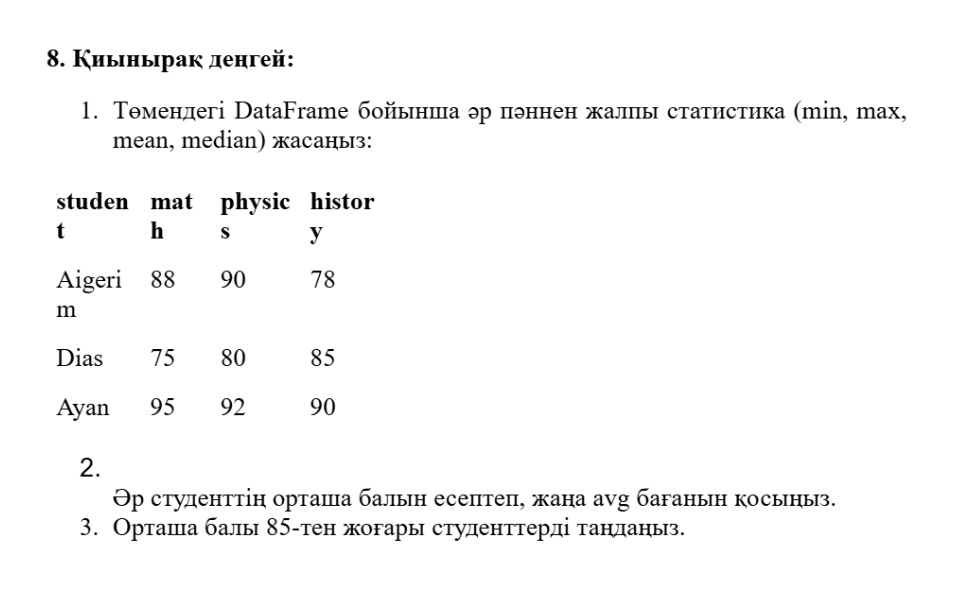

In [21]:
students = pd.DataFrame({
    'students': ['Aigerim', 'Dias', 'Ayan'],
    'math': [88, 75, 95],
    'physics': [90, 80, 92],
    'history': [78, 85, 90]
})

,students,math,physics,history
0,Aigerim,88,90,78
1,Dias,75,80,85
2,Ayan,95,92,90


In [22]:
# 1
students[['math', 'physics', 'history']].agg(['min', 'max', 'mean', 'median'])

,math,physics,history
min,75.0,80.000000,78.000000
max,95.0,92.000000,90.000000
mean,86.0,87.333333,84.333333
median,88.0,90.000000,85.000000


In [25]:
# 2
students['avg'] = students[['math', 'physics', 'history']].mean(axis=1)
students

,students,math,physics,history,avg
0,Aigerim,88,90,78,85.333333
1,Dias,75,80,85,80.000000
2,Ayan,95,92,90,92.333333


In [26]:
# 3
students[students['avg'] > 85]

,students,math,physics,history,avg
0,Aigerim,88,90,78,85.333333
2,Ayan,95,92,90,92.333333
